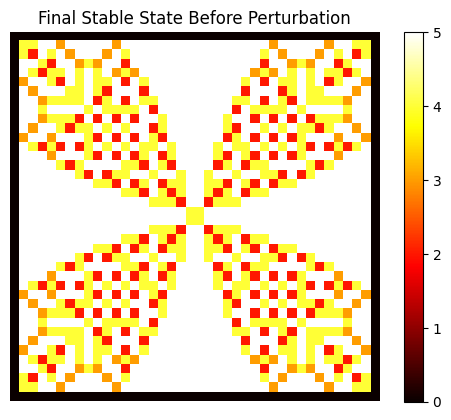

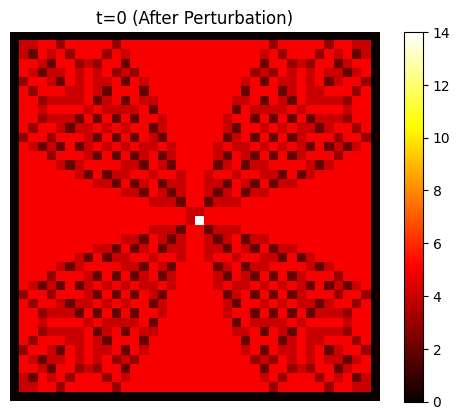

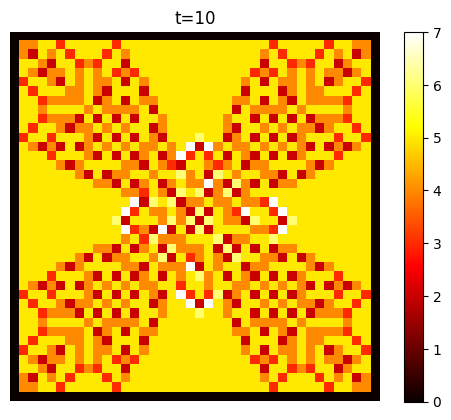

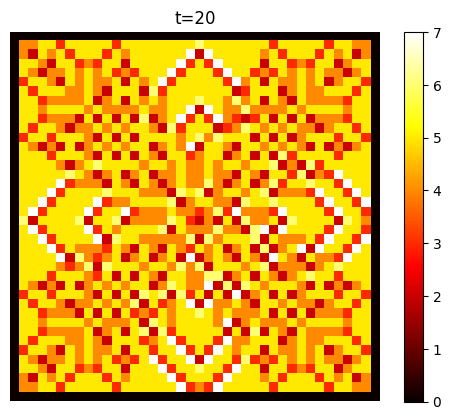

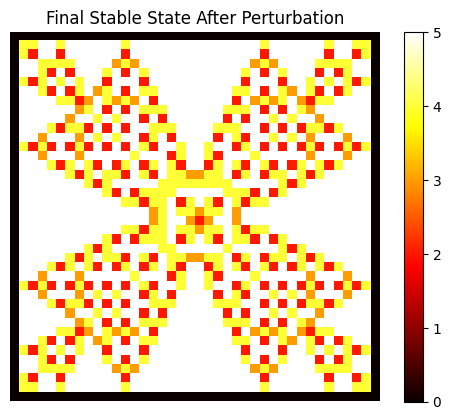

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initialize_lattice(L, threshold):
    """Initialize LxL lattice with all sites at the threshold and fixed boundary condition."""
    lattice = np.full((L, L), threshold)
    lattice[0, :] = lattice[:, 0] = lattice[-1, :] = lattice[:, -1] = 0  # Fixed boundaries
    return lattice

def stabilize(lattice, threshold):
    """Run the sandpile model until stabilization."""
    L = lattice.shape[0]
    stable = False
    while not stable:
        stable = True
        for i in range(1, L - 1):
            for j in range(1, L - 1):
                if lattice[i, j] >= threshold:
                    lattice[i, j] -= 4
                    if i > 1: lattice[i-1, j] += 1
                    if i < L-2: lattice[i+1, j] += 1
                    if j > 1: lattice[i, j-1] += 1
                    if j < L-2: lattice[i, j+1] += 1
                    stable = False
    return lattice

def apply_perturbation(lattice, perturbation, center):
    """Apply perturbation at the given center."""
    cx, cy = center
    lattice[cx, cy] += perturbation

def evolve_until_stable(lattice, threshold):
    """Evolve the system until it stabilizes after perturbation, ensuring snapshots at t=0, t=10, t=20."""
    L = lattice.shape[0]
    snapshots = [lattice.copy()]  
    
    stable = False
    t = 0
    while not stable or t < 20:
        stable = True
        new_lattice = lattice.copy()
        
        for i in range(1, L - 1):
            for j in range(1, L - 1):
                if lattice[i, j] >= threshold:
                    new_lattice[i, j] -= 4
                    if i > 1: new_lattice[i-1, j] += 1
                    if i < L-2: new_lattice[i+1, j] += 1
                    if j > 1: new_lattice[i, j-1] += 1
                    if j < L-2: new_lattice[i, j+1] += 1
                    stable = False
        
        lattice[1:L-1, 1:L-1] = new_lattice[1:L-1, 1:L-1]  
        t += 1
        
        if t == 10 or t == 20:
            snapshots.append(lattice.copy())  
    
    snapshots.append(lattice.copy())  
    return snapshots

def plot_lattice(lattice, title):
    """Plot a given lattice configuration with improved colormap."""
    plt.imshow(lattice, cmap='hot', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.colorbar()
    plt.show()


roll_number = 2021101113
L = ((roll_number % 7) + 1) * 10
threshold = (roll_number % 5) + 3
perturbation = 10  
center = (L // 2, L // 2)  


lattice = initialize_lattice(L, threshold)
lattice = stabilize(lattice, threshold)
plot_lattice(lattice, "Final Stable State Before Perturbation")


apply_perturbation(lattice, perturbation, center)
snapshots = evolve_until_stable(lattice, threshold)


plot_lattice(snapshots[0], "t=0 (After Perturbation)")
if len(snapshots) > 1:
    plot_lattice(snapshots[1], "t=10")
if len(snapshots) > 2:
    plot_lattice(snapshots[2], "t=20")
plot_lattice(snapshots[-1], "Final Stable State After Perturbation")